In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
baseball = pd.read_csv("Baseball.csv")
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Checking for Outliers

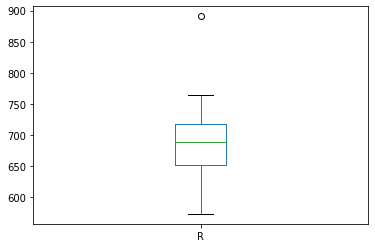

In [4]:
baseball["R"].plot.box()

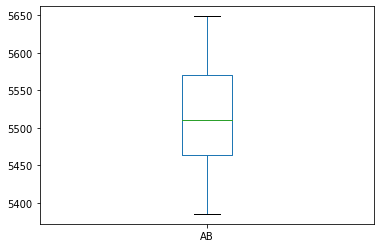

In [5]:
baseball["AB"].plot.box() # no outliers 

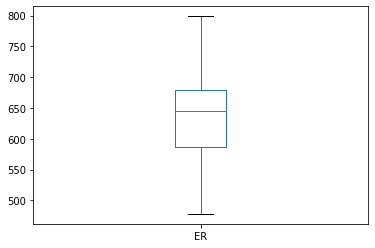

In [6]:
baseball["ER"].plot.box() #no outliers

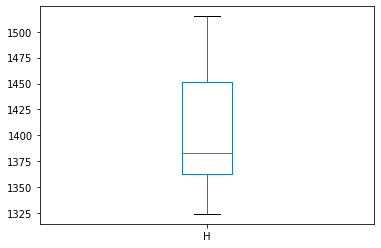

In [7]:
baseball["H"].plot.box() #no outliers

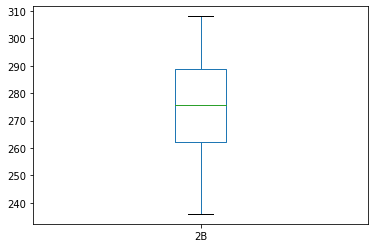

In [8]:
baseball["2B"].plot.box()  #no outliers

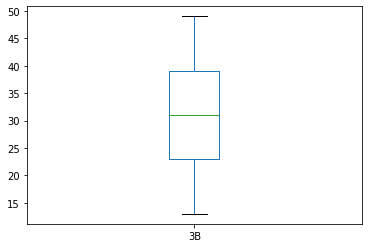

In [9]:
baseball["3B"].plot.box() #no outliers

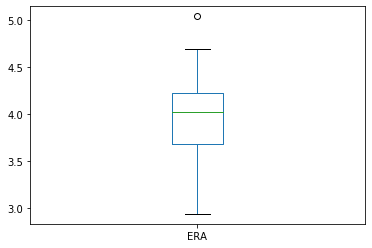

In [10]:
baseball["ERA"].plot.box()

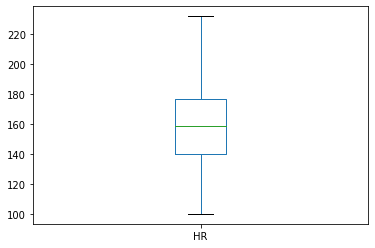

In [11]:
baseball["HR"].plot.box()  #no outliers

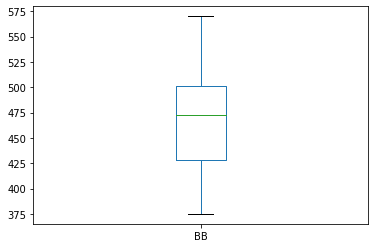

In [12]:
baseball["BB"].plot.box() #no outliers

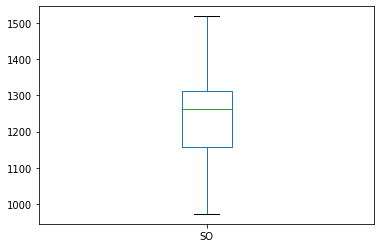

In [13]:
baseball["SO"].plot.box()  #no outliers

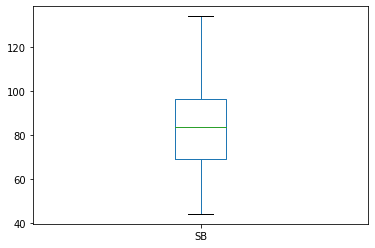

In [14]:
baseball["SB"].plot.box()   #no outliers

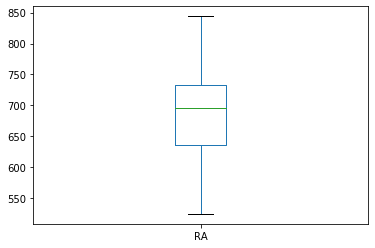

In [15]:
baseball["RA"].plot.box()  #no outliers

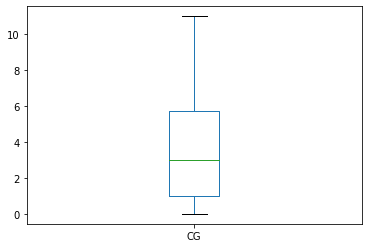

In [16]:
baseball["CG"].plot.box()   #no outliers

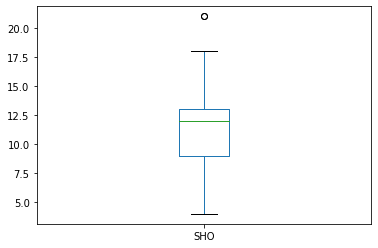

In [17]:
baseball["SHO"].plot.box()  # outliers seen should be treatest accordingly

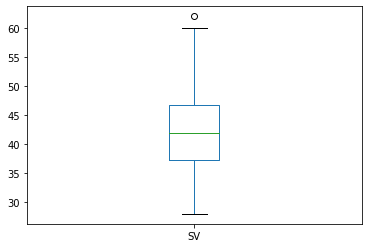

In [18]:
baseball["SV"].plot.box()   # outlier seen

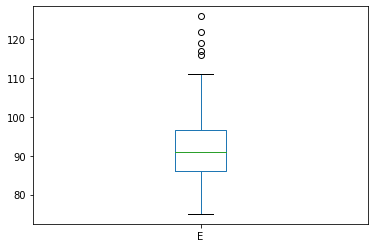

In [19]:
baseball["E"].plot.box()   # oulliers observed

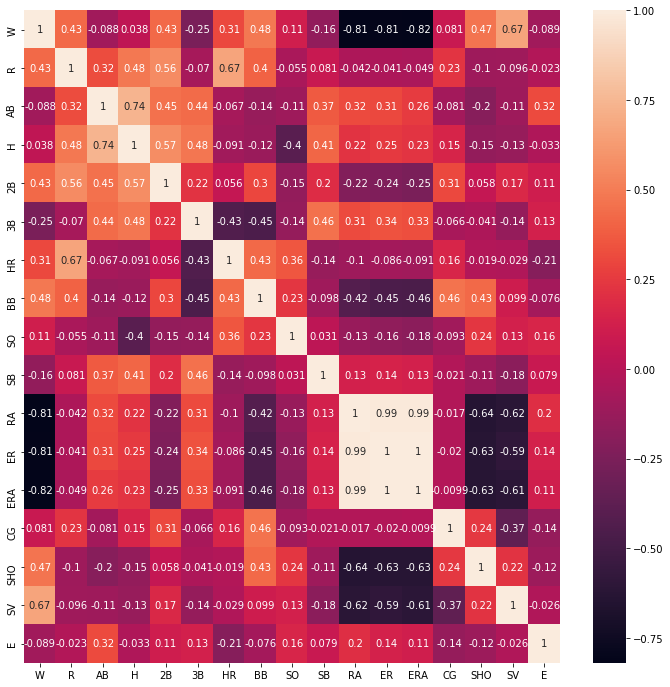

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(baseball.corr(),annot = True)
plt.show()

In [21]:
baseball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [22]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        return col_corr

In [23]:
corr_features = correlation(baseball,0.85)
len(set(corr_features))

0

In [24]:
baseball.drop(["ER","ERA","RA"],axis=1,inplace=True)
baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97


In [25]:
from scipy.stats import zscore
z = np.abs(zscore(baseball))
z
print(baseball.shape)
baseball_final=baseball.loc[(z<3).all(axis=1)]
print(baseball_final.shape)

(30, 14)
(29, 14)


In [26]:
baseball_final.shape

(29, 14)

In [27]:
threshold = 3
print(np.where(z>3))
baseball = baseball.loc[(z<3).all(axis=1)]
baseball.shape


(array([5], dtype=int64), array([1], dtype=int64))


(29, 14)

In [28]:
baseball.shape

(29, 14)

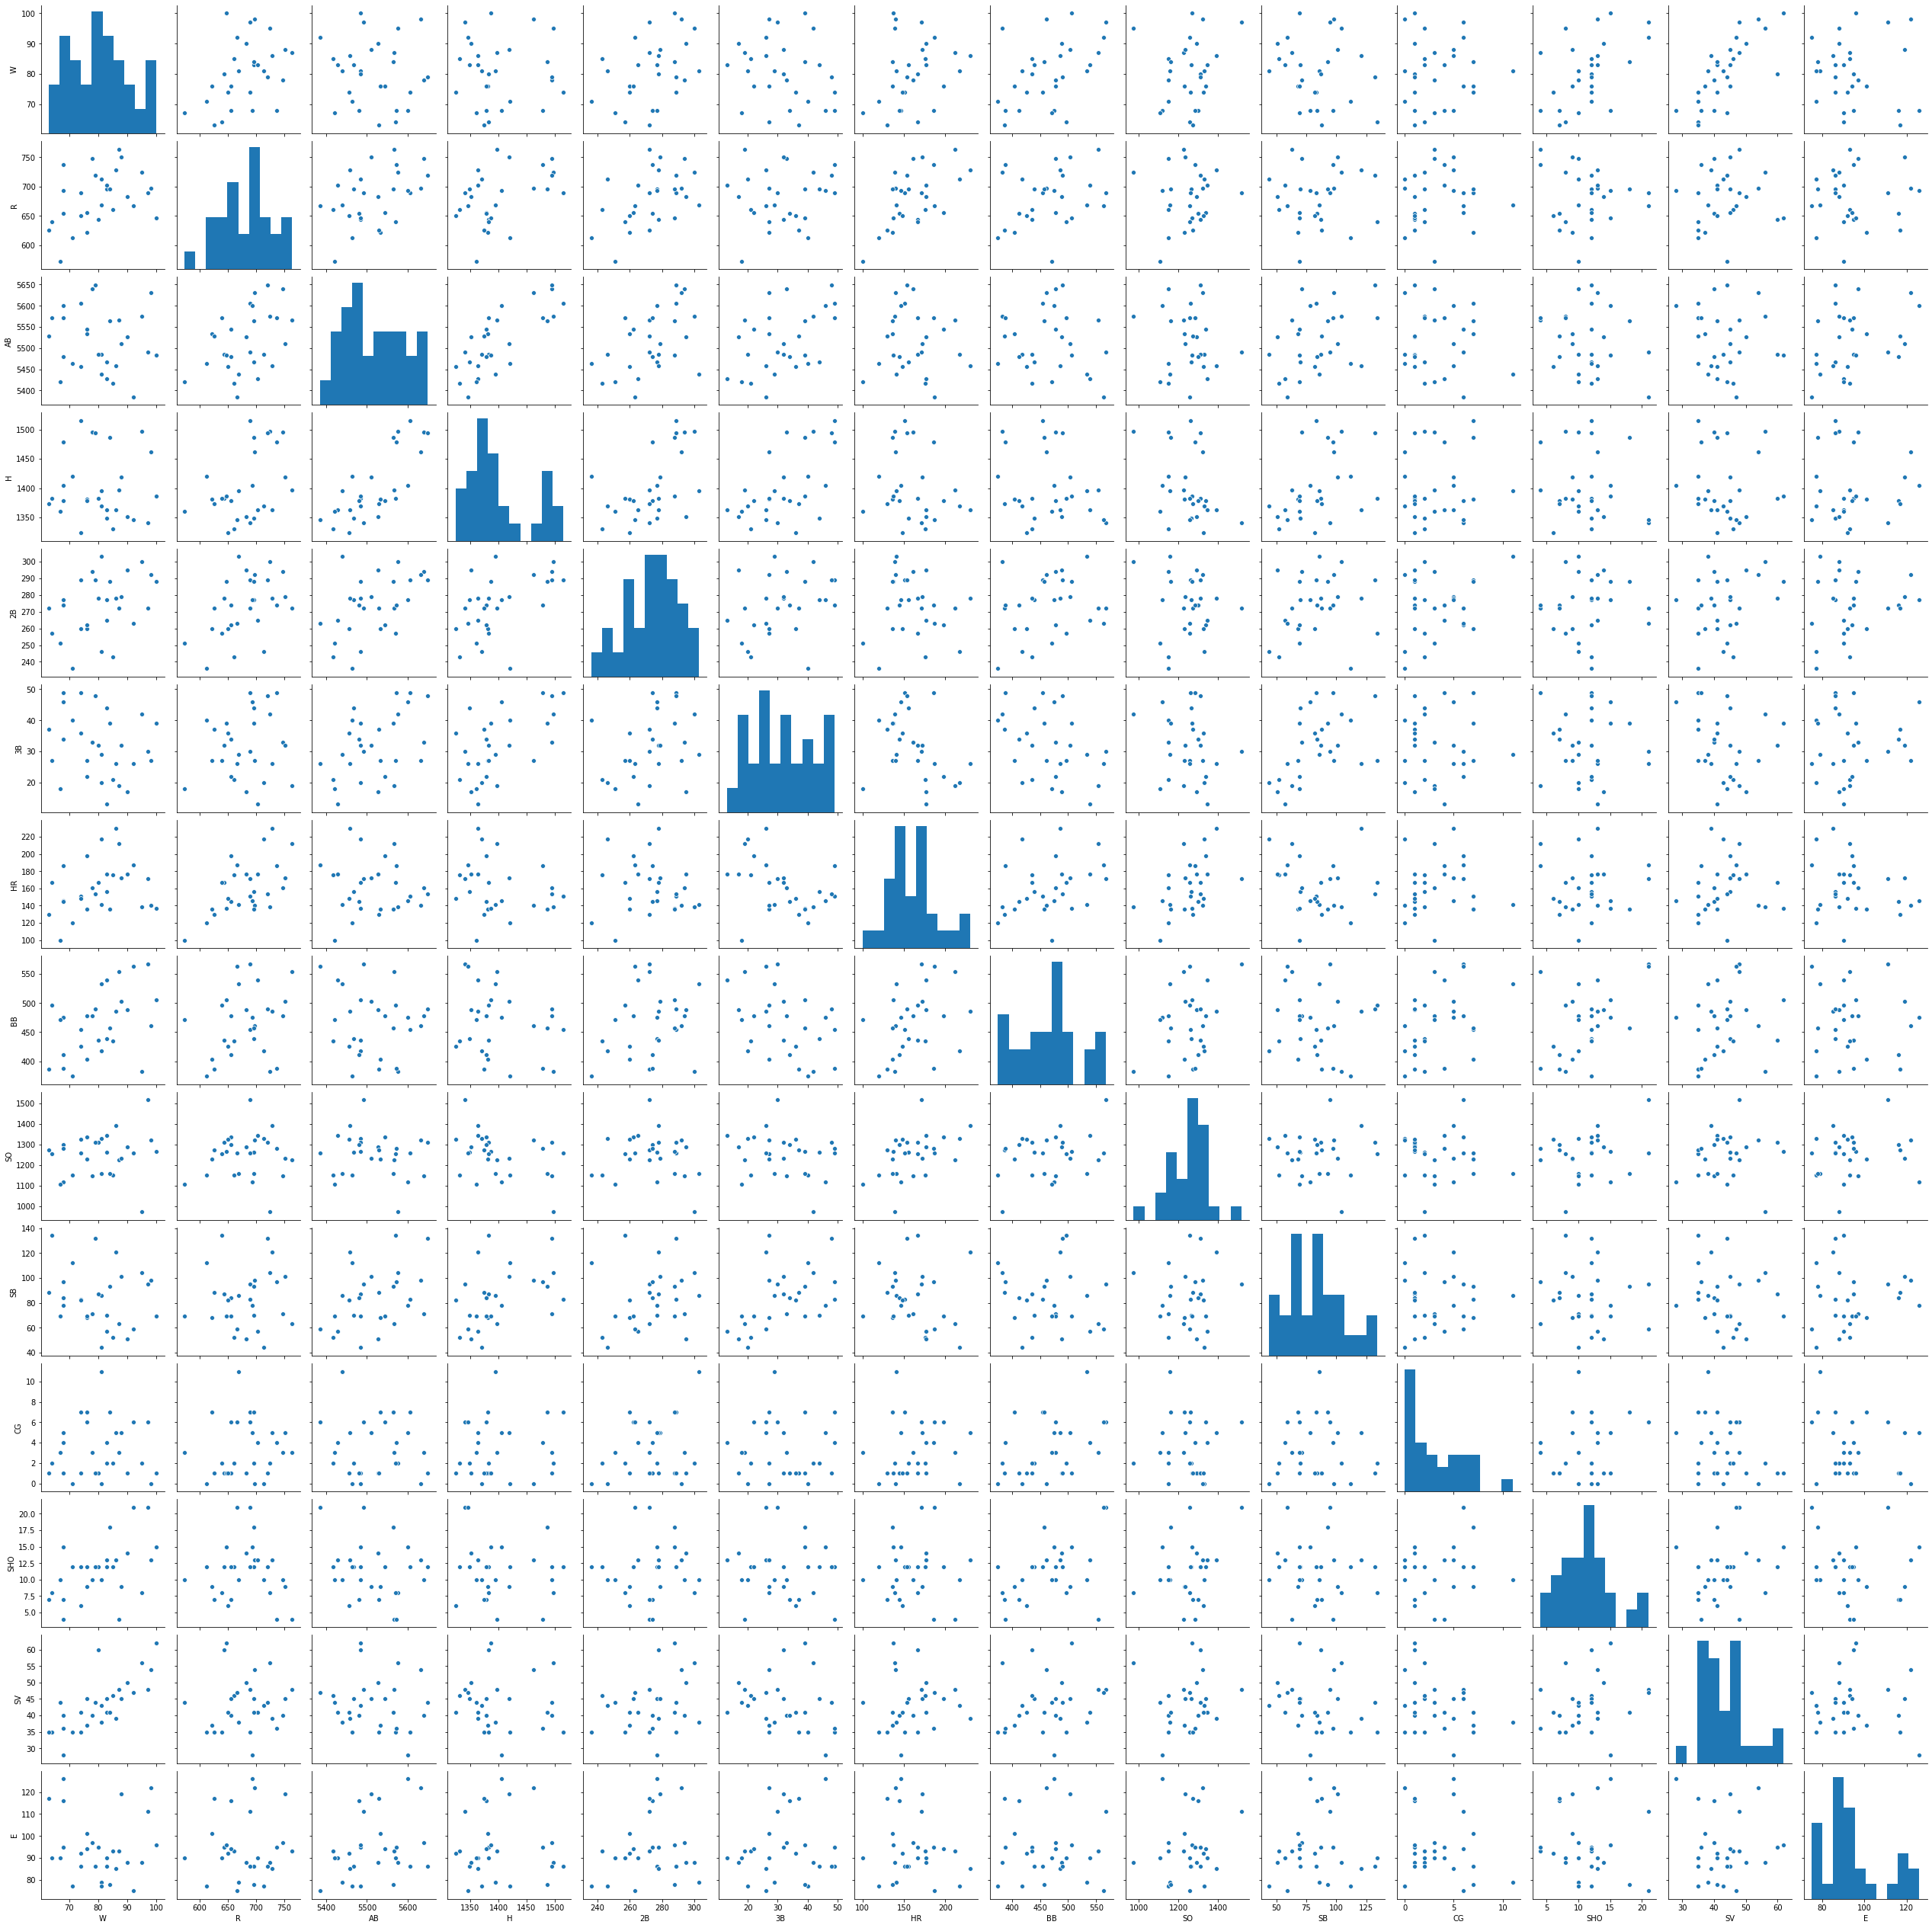

In [29]:
sns.pairplot(baseball)

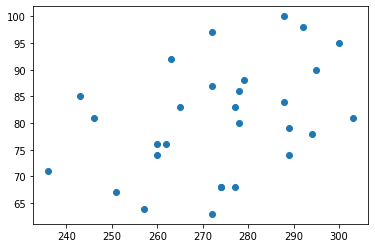

In [30]:
plt.scatter(baseball["2B"],baseball["W"])

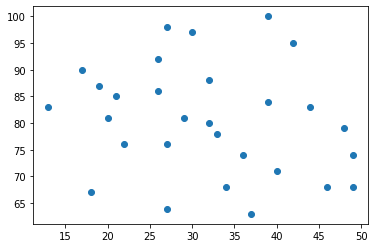

In [31]:
plt.scatter(baseball["3B"],baseball["W"])

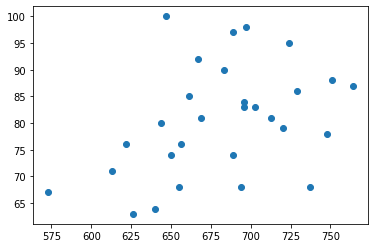

In [32]:
plt.scatter(baseball["R"],baseball["W"])

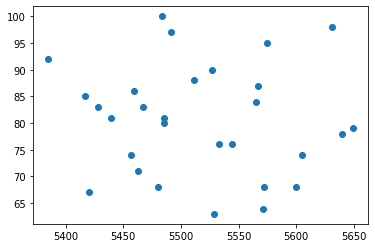

In [33]:
plt.scatter(baseball["AB"],baseball["W"])

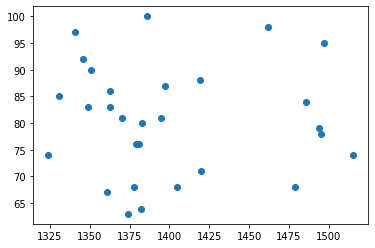

In [34]:
plt.scatter(baseball["H"],baseball["W"])

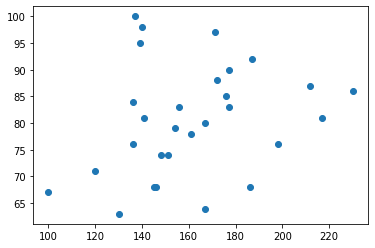

In [35]:
plt.scatter(baseball["HR"],baseball["W"])

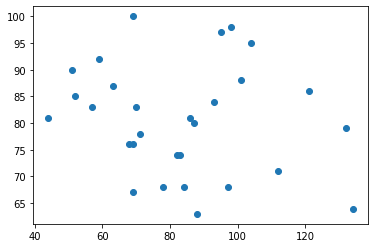

In [36]:
plt.scatter(baseball["SB"],baseball["W"])

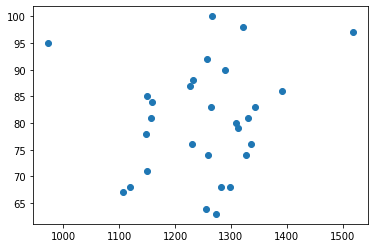

In [37]:
plt.scatter(baseball["SO"],baseball["W"])

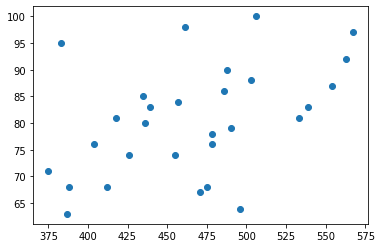

In [38]:
plt.scatter(baseball["BB"],baseball["W"])

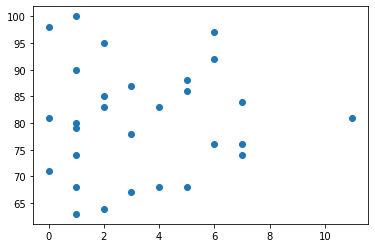

In [39]:
plt.scatter(baseball["CG"],baseball["W"])

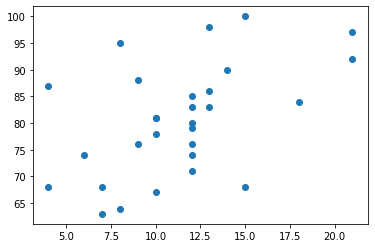

In [40]:
plt.scatter(baseball["SHO"],baseball["W"])

In [41]:
baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [42]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
base= pt.fit_transform(baseball)  
base = pd.DataFrame(baseball,columns=baseball_final.columns)
base
        

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


In [43]:
base.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [44]:
x = base.drop('W',axis=1)
y = base["W"]



In [45]:
base1 = base.drop('W',axis=1)

In [46]:
x.shape

(29, 13)

In [47]:
y.shape

(29,)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns=base1.columns)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state= r_state
print("max r2 score to ", final_r_state,"is", max_r_score)


max r2 score to  44 is 0.7660686817493209


In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("error")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("root mean squred error:",np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 6.060717428741531
mean squared error: 64.88191301727106
root mean squred error: 8.054930975326297


In [51]:
from sklearn.model_selection import cross_val_score
a_score = cross_val_score(LinearRegression(),x,y,cv=5,scoring ="r2")
a_score

array([-0.57600496, -1.8319136 ,  0.5130541 ,  0.70637175,  0.58168741])

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
ls = Lasso()
parameters = {"alpha":[0.0001,0.001,0.01,0.1]}
clf= GridSearchCV(ls,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.0001}

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
import warnings 
warnings.filterwarnings("ignore")
gbr = GradientBoostingRegressor()
parameters = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[50,100,150,200,250]}
clft = GridSearchCV(gbr,parameters,cv=5)
clft.fit(x,y)
clft.best_params_

{'learning_rate': 0.01, 'n_estimators': 50}

In [60]:
ls = Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9798940661905421

In [61]:
rg = Ridge(alpha=0.001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.9798965342746567

In [62]:
from sklearn.externals import joblib
joblib.dump(ls,"Baseball wins.obj")

['Baseball wins.obj']

In [63]:
model = joblib.load("Baseball wins.obj")

In [64]:
model.predict(x_test)

array([81.08853726, 63.65727958, 93.93402613, 83.35943477, 83.1015554 ,
       92.41834039, 74.85924547, 91.74712704, 78.02949407, 94.63232363])